# Kalman Filter – Tracking Dynamic Uncertainty

---

## What is this?

This notebook demonstrates the **Kalman Filter** as a way to track **uncertainty** (mean + covariance) in dynamic systems.

---

## Core idea

- The **Kalman Filter** continuously updates an estimated **mean** and **covariance** based on noisy observations.
- Each new observation reduces uncertainty (shrinks covariance), while prediction steps may expand it.
- The state estimate gets more confident over time if the data is reliable.

---

## What we’ll do

1. Define a 1D state evolving over time  
2. Use Kalman equations to update `mean` and `variance`  
3. Visualize the dynamic confidence bands (±std)  
4. Show how observations shape our belief over time

---

## Goal

> See how **shape = uncertainty**, and how Kalman tracks it step-by-step.


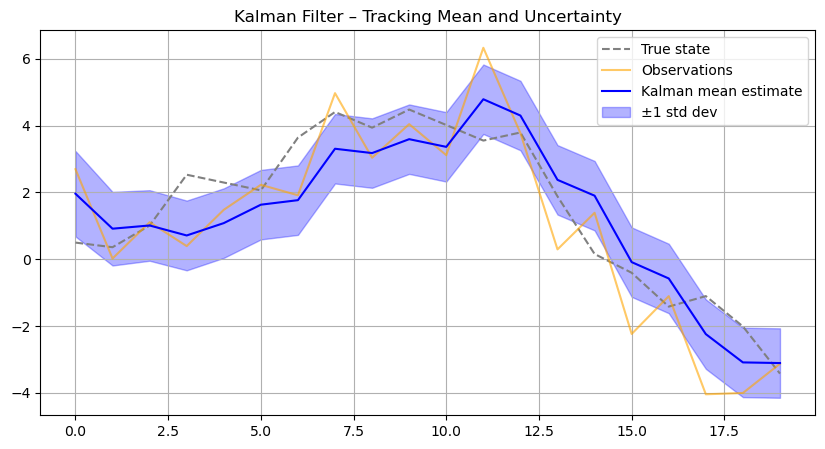

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True hidden state
np.random.seed(42)
n = 20
true_x = np.cumsum(np.random.normal(0, 1, n))

# Observations (noisy measurements)
obs = true_x + np.random.normal(0, 1.5, n)

# Kalman initial guess
mu = 0       # initial mean
sigma2 = 5   # initial variance

mu_list = []
std_list = []

Q = 1     # process noise
R = 1.5**2  # measurement noise

for z in obs:
    # Prediction step
    mu = mu
    sigma2 = sigma2 + Q

    # Update step
    K = sigma2 / (sigma2 + R)
    mu = mu + K * (z - mu)
    sigma2 = (1 - K) * sigma2

    mu_list.append(mu)
    std_list.append(np.sqrt(sigma2))

# Plot
plt.figure(figsize=(10,5))
plt.plot(true_x, label='True state', linestyle='--', color='gray')
plt.plot(obs, label='Observations', color='orange', alpha=0.6)
plt.plot(mu_list, label='Kalman mean estimate', color='blue')
plt.fill_between(range(n),
                 np.array(mu_list) - np.array(std_list),
                 np.array(mu_list) + np.array(std_list),
                 alpha=0.3, color='blue', label='±1 std dev')
plt.title("Kalman Filter – Tracking Mean and Uncertainty")
plt.legend()
plt.grid(True)
plt.show()


At each time step, the Kalman filter predicts the state and updates it based on the new observation.

The shaded band shows how the uncertainty shrinks as more data is observed.

The blue line is the filter's estimate, the shaded area shows the uncertainty (±1σ), and the orange line shows raw observations.

Over time, the estimate converges closer to the true state while the uncertainty adjusts based on the observation quality.

This dynamic update of mean and variance is crucial in energy systems where demand and supply can fluctuate.

I can now see how the shape (variance) evolves over time — and I can trust my estimate more when uncertainty is small.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


dt = 1.0


A = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1,  0],
    [0, 0, 0,  1]
])


H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])


x = np.array([[0], [0], [1], [0.5]])


P = np.eye(4) * 500


Q = np.eye(4) * 0.2


R = np.eye(2) * 5.0


In [3]:
true_pos = []
obs_pos = []
est_pos = []


true_x = x.copy()

for _ in range(20):

    true_x = A @ true_x
    true_pos.append(true_x[:2].flatten())


    z = H @ true_x + np.random.multivariate_normal([0, 0], R).reshape(2, 1)
    obs_pos.append(z.flatten())


    x = A @ x
    P = A @ P @ A.T + Q


    y = z - H @ x                    # Innovation
    S = H @ P @ H.T + R              # Innovation covariance
    K = P @ H.T @ np.linalg.inv(S)  # Kalman Gain

    x = x + K @ y                    # State update
    P = (np.eye(4) - K @ H) @ P      # Covariance update

    est_pos.append(x[:2].flatten())


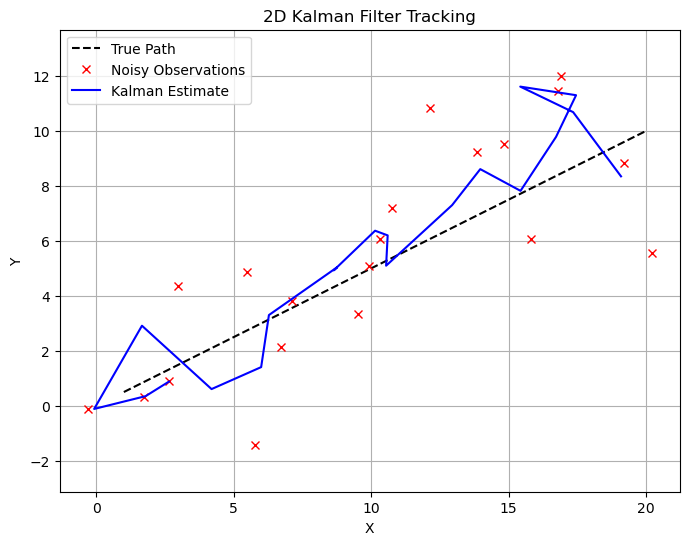

In [4]:
true_pos = np.array(true_pos)
obs_pos = np.array(obs_pos)
est_pos = np.array(est_pos)

plt.figure(figsize=(8, 6))
plt.plot(true_pos[:, 0], true_pos[:, 1], 'k--', label='True Path')
plt.plot(obs_pos[:, 0], obs_pos[:, 1], 'rx', label='Noisy Observations')
plt.plot(est_pos[:, 0], est_pos[:, 1], 'b-', label='Kalman Estimate')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Kalman Filter Tracking')
plt.grid(True)
plt.axis('equal')
plt.show()
